In [7]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

# Problem Set 4

### PHYS 441

***

Adam A Miller  
23 October 2023  
version 0.2

Problem sets for PHYS 441/DATA SCI 421 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work** (if you submit a pdf, be sure the pdf does not cut off text or lines of code). *Submissions that only include answers will have points deducted.*

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## New note

**If you submit a jupyter notebook as a pdf MAKE SURE the pdf shows all the text/code within the cells. Lines of code that are very long do not automatically "wrap" when exporting to pdf**

## Problem 1) 20 points

Consider a p.d.f. of the form:

$$f(x; \alpha) = \begin{cases} C (1 - x)^{\alpha- 1} & \text{$0 \leq x \leq 1$} \\
 0 & \text{otherwise} \end{cases}$$
 
where $C$ is a normalization constant.

**Problem 1a**

Calculate the value of $C$ by performing an integral.
(show your work, do not just enter this into a calculator)


\begin{align}
\int_{-\infty}^{\infty} f(x;\alpha) dx  &= 1 & \text{hence} \\ 

\int_{-\infty}^{\infty} f(x;\alpha) dx  &= \int_{0}^{1} C(1-x)^{\alpha-1} dx \\ 
\end{align}

Using integration by substitution, let $u=1-x$, then $du=-dx$ and 

\begin{align}
\int_{0}^{1} C(1-x)^{\alpha-1} dx   &= -C \int_{1}^{0} u^{\alpha-1} du \\ 
                                    &= -C \frac{u^{\alpha}}{\alpha} \Big |_{1}^{0} \\ 
                                    &= -C (0-\frac{1}{\alpha}) \\ 
                                    &= \frac{C}{\alpha} = 1 & \text{; hence } && C = \alpha 
\end{align}

**Problem 1b**

Calculate the c.d.f. $F(x; \alpha)$.

Let $u=1-x$ ($x=1-u$) and $du=-dx$, then 

\begin{align}
F(x)    &= \int_{-\infty}^{x} f(x) dx \\
        &= \int_{-\infty}^{x} \alpha (1-x)^{\alpha-1} dx \\ 
        &= \alpha \int_{0}^{x} (1-x)^{\alpha-1} dx \\  
        &= -\alpha \int_{1}^{u} u^{\alpha-1} du \\ 
        &= -\alpha \frac{u^{\alpha}}{\alpha} \Big |_{1}^{u} \\ 
        &= -\alpha (\frac{u^{\alpha}}{\alpha} - \frac{1}{\alpha}) \\ 
        &= 1 - u^{\alpha} = 1 - (1-x)^{\alpha}
\end{align} 

**Problem 1c**

Assuming that $\alpha = 3$ plot the c.d.f.

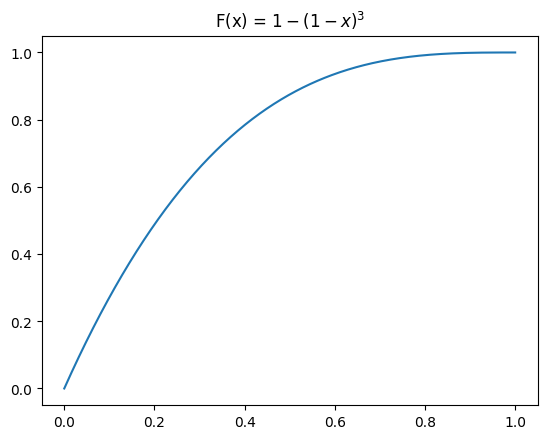

In [15]:
def get_cdf(datapoints=500):
    x_axis = np.linspace(0, 1, datapoints)
    y_axis = list(map(lambda x: 1-(1-x)**3, x_axis)) 

    return x_axis, y_axis

fig, ax = plt.subplots() 
x, y = get_cdf() 
ax.set_title('F(x) = $1 - (1-x)^3$')

plt.plot(x, y)
plt.show() 

**Problem 1d**

Write down an expression for $\hat{\alpha_\mathrm{ML}}$, the maximum likelihood estimator of $\alpha$. 

In the expression you may assume there have been $N$ observations of the random variable $x$, and you can write the result in terms of a sum that depends on the $x_i$ observations.

\begin{align}
L(\alpha)       &= \prod_{i=1}^{N} \alpha(1-x_{i})^{\alpha-1} \\ 
log L(\alpha)   &= \sum_{i=1}^{N} (log(\alpha)+(\alpha-1)log(1-x_{i})) \\ 
                &= \sum_{i=1}^{N} log(\alpha) + (\alpha-1) \sum_{i=1}^{N}log(1-x_{i}) \\ 
                &= N \cdot log(\alpha) + (\alpha-1) \sum_{i=1}^{N}log(1-x_{i}) \\ \\ 

\frac{\partial log L(\alpha)}{\partial \alpha}  &= \frac{N}{\alpha} +  \sum_{i=1}^{N}log(1-x_{i}) = 0 \\ 
\hat{\alpha_\mathrm{ML}}    &= - \frac{N}{\sum_{i=1}^{N}log(1-x_{i})} 
\end{align}

**Probelm 1e**

Draw 100 random samples from this p.d.f. (again with $\alpha = 3$), and use these samples to calculate the estimator for $\alpha, \hat{\alpha_\mathrm{ML}}$.

Is this estimate reasonable given the known value of $\alpha$?

\begin{align}
F(x)        &= 1-(1-x)^{3}  \\ 
F^{-1}(x)   &= 1-\sqrt[3]{1-x}
\end{align}

In [48]:
import math 
import scipy.stats as stats 
 
def sample_inverse_CDF(size):
    samples_0_to_1 = stats.uniform.rvs(size=size) 
    return 1 - np.cbrt(1-samples_0_to_1)


def estimator(samples):
    N = len(samples) 
    f = lambda x: np.log(1-x) 

    return -N/sum(f(samples)) 

for size in [100, 1000, 10000, 100000]: 
    samples = sample_inverse_CDF(size)
    estimation = estimator(samples)

    print(f"Estimation for {size:<8} samples: {estimation:.4f}")

Estimation for 100      samples: 2.9123
Estimation for 1000     samples: 3.0893
Estimation for 10000    samples: 2.9600
Estimation for 100000   samples: 3.0024


Seems pretty reasonable to me. 



## Problem 2) 5 points

Consider the following 3 situations: 

(a) In an experiment with 4 degrees of freedom, you measure $\chi^2_\nu = 2.3$  
(b) In an experiment with 20 degrees of freedom, you measure $\chi^2_\nu = 1.4$  
(c) In an experiment with 12345 degrees of freedom, you measure $\chi^2_\nu = 1.07$

Based on their $P$-values, which of these results would you doubt the most?

In [180]:
from scipy.stats import chi2

exps = ['a', 'b', 'c']
chi_squares = [2.3, 1.4, 1.07] 
degrees = [4, 20, 12345] 

for exp, chi_s, drg in zip(exps, chi_squares, degrees):
    p_val = chi2.sf(x=chi_s, df=drg) 
    print(f'For ({exp}) the P-value is: {p_val}')

print("Would doubt exp C the most based on the p value") 

For (a) the P-value is: 0.6807690541649645
For (b) the P-value is: 0.9999999958732985
For (c) the P-value is: 1.0


*write your answer here*



## Problem 3) 15 points

Consider the following observations drawn from a Gaussian distribution (you may also execute the cell below to load these data into python).

[21.34991068,17.03365346,22.3624337,17.14595484,26.22432382,24.54083346,18.02468367,18.48944392,16.48320874,21.09502049,25.62458937,22.71152072,23.49396549,19.13371957,26.9913811,23.28373906,26.03903969,19.17151187,24.18697064,23.05591374,12.40077576,27.95187729,29.73031488,18.33199626,27.82481229,20.93731875,29.51205706,27.43489328,16.8524255,25.10598605,23.64102009,25.21573825,15.82490327,18.35316616,31.25506351,22.48764312,23.95983729,19.71251619,23.29590823,21.6477857,22.85205999,20.10330439,26.69973219,28.41423071,20.43268376,19.8345963,33.67697139,22.85933253,32.58355139,22.7753049,17.22132842,22.56410502,24.10491912,18.67347961,18.84397928,20.39535811,24.21694659,31.09858686,15.88979508,26.93012214,19.67642504,23.03519847,27.04876197,18.71470615,21.23794713,31.05055806,26.66288228,17.3226034,20.30355193,20.33909743,23.92711395,17.88477367,20.1667467,23.0543670,21.39130572,25.06653193,28.53144452,18.57090768,24.79045727,18.52871602,23.96836545,21.75832276,16.30265442,21.82535507,21.68394026,23.76684835,19.22956309,17.20462486,27.99510289,19.01816796,20.05512557,23.72473121,20.32826806,25.16924535,19.58547389,33.14463493,18.09812041,22.38601579,13.28536472,20.12205255]

In [50]:
obs = np.array([21.34991068,17.03365346,22.3624337,17.14595484,26.22432382,24.54083346,18.02468367,18.48944392,16.48320874,21.09502049,25.62458937,22.71152072,23.49396549,19.13371957,26.9913811,23.28373906,26.03903969,19.17151187,24.18697064,23.05591374,12.40077576,27.95187729,29.73031488,18.33199626,27.82481229,20.93731875,29.51205706,27.43489328,16.8524255,25.10598605,23.64102009,25.21573825,15.82490327,18.35316616,31.25506351,22.48764312,23.95983729,19.71251619,23.29590823,21.6477857,22.85205999,20.10330439,26.69973219,28.41423071,20.43268376,19.8345963,33.67697139,22.85933253,32.58355139,22.7753049,17.22132842,22.56410502,24.10491912,18.67347961,18.84397928,20.39535811,24.21694659,31.09858686,15.88979508,26.93012214,19.67642504,23.03519847,27.04876197,18.71470615,21.23794713,31.05055806,26.66288228,17.3226034,20.30355193,20.33909743,23.92711395,17.88477367,20.1667467,23.0543670,21.39130572,25.06653193,28.53144452,18.57090768,24.79045727,18.52871602,23.96836545,21.75832276,16.30265442,21.82535507,21.68394026,23.76684835,19.22956309,17.20462486,27.99510289,19.01816796,20.05512557,23.72473121,20.32826806,25.16924535,19.58547389,33.14463493,18.09812041,22.38601579,13.28536472,20.12205255])

**Problem 3a**

What is the value of the maximum likelihood estimator for the mean of the Gaussian?

\begin{align}

\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_{i}

\end{align}

In [53]:
mu = np.sum(obs)/len(obs) 
print(f"mu = {mu:.4f}") 

mu = 22.4404


**Problem 3b**

Plot the log likelihood for the observations as a function of $\mu$ the mean of the Gaussian distribution over a reasonable range of $\mu$.

*Hint* – for the plot you can assume the variance for the p.d.f. is 1.

\begin{align}
logL(\mu, 1)    &= \sum_{i=1}^{n} log f(x_{i}; \mu, 1) \\
                &= \sum_{i=1}^{n} (log\frac{1}{\sqrt{2\pi}} + \frac{1}{2}log\frac{1}{1^2} - \frac{(x_{i} - \mu)^2}{2 \cdot 1^2}) \\ 
                &= \sum_{i=1}^{n} (log\frac{1}{\sqrt{2\pi}} + \frac{(x_{i} - \mu)^2}{2}) \\ 
\end{align}

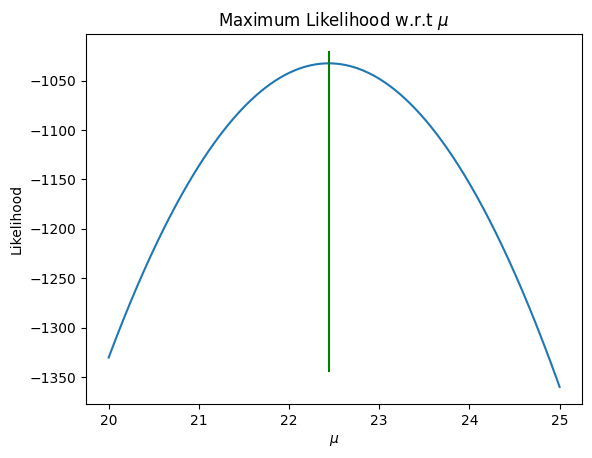

In [176]:
def gaussian_log_likelihood(mean, std, samples):
    f = lambda x: np.log(1/np.sqrt(2*np.pi)) + 0.5*np.log(1/np.square(std)) - np.square(x-mean)/(2*np.square(std))
    # f = lambda x: np.log(1/np.sqrt(2*np.pi)) + np.square(x-mean)/2
    return np.sum(f(samples)) 

x_min, x_max = 20, 25
x = np.linspace(x_min, x_max, 1000) 
y = [gaussian_log_likelihood(mean, std=1, samples=obs) for mean in x] 

fig, ax = plt.subplots() 
ax.set_title('Maximum Likelihood w.r.t $\mu$ ')
ax.set_xlabel('$\mu$') 
ax.set_ylabel('Likelihood')


plt.plot(x, y)
plt.vlines(x=mu, ymin=-1345, ymax=-1020, colors='green')
plt.show() 

**Problem 3c**

Does your plot agree with your estimate from **3a**?

Show your work

The green line in the plot above is the estimation from 3a. The line intersects with the curve at nearly the maximum value, agreeing with the estimation from 3a. 


**Problem 3d**

Using the graphical method discussed in lecture, what is the  standard deviation for the estimator of the mean, $\sigma_{\hat{\mu}}$?

0.10144318649999207
0.10155681350001089


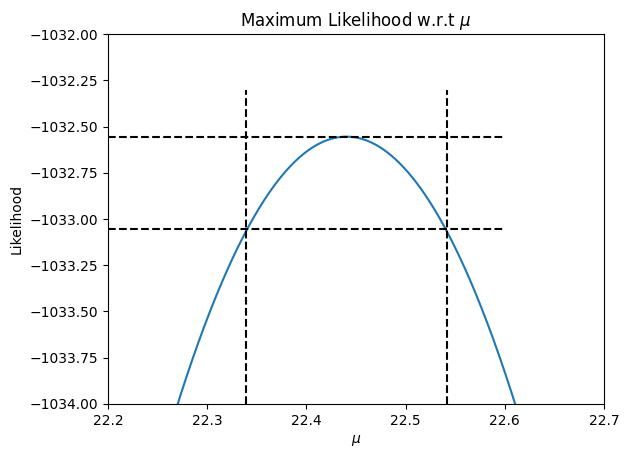

In [173]:
L_max = gaussian_log_likelihood(mu, std=1, samples=obs) 
half_L_max = L_max-0.5

x_lim_left      = 22.2
x_lim_right     = 22.7
y_lim_top       = -1032
y_lim_bottom    = -1034

delta_mu_negative = 22.339
delta_mu_positive = 22.542

print(mu - delta_mu_negative)
print(delta_mu_positive - mu)

fig, ax = plt.subplots() 
ax.set_title('Maximum Likelihood w.r.t $\mu$ ')
ax.set_xlabel('$\mu$') 
ax.set_xlim(left=x_lim_left, right=x_lim_right)
ax.set_ylabel('Likelihood')
ax.set_ylim(top=y_lim_top , bottom=y_lim_bottom)

plt.plot(x, y)
plt.hlines(y=L_max,             xmin=x_lim_left,   xmax=x_lim_right-0.1, colors='black', ls='--')
plt.hlines(y=half_L_max,        xmin=x_lim_left,   xmax=x_lim_right-0.1, colors='black', ls='--')
plt.vlines(x=delta_mu_negative, ymin=y_lim_bottom, ymax=y_lim_top-0.3,   colors='black', ls='--')
plt.vlines(x=delta_mu_positive, ymin=y_lim_bottom, ymax=y_lim_top-0.3,   colors='black', ls='--')
plt.show()  

$ \hat{\sigma_{\hat{\mu}}} \approx \delta \hat{\mu_{-}} \approx \delta \hat{\mu_{+}} \approx 0.101 $

## Problem 4) 20 points

You design an experiment to observe a random variable that follows the binomial distribution. For the experiment the probability of success $p$ is unknown. 

**Problem 4a**

You conduct 3 different experiments each with 3 trials. The results are:  
Experiment 1 – 2 success, 1 failure  
Experiment 2 – 3 success, 0 failure  
Experiment 3 - 2 success, 1 failure

What is the likelihood for these experimental results? Show all your work and write your answer as a function of $p$ (this is a problem that does not require a computer so your solution should show your full derivation). 

\begin{align}
L(p)    &= \prod_{i=1}^{n} f(k_{i}, n, p) \\ 
        &= \prod_{i=1}^{n} p^{k_{i}}(1-p)^{1-k_{i}} \\ 
        &= p^{\sum_{i=1}^{n}k_{i}}(1-p)^{\sum_{i=1}^{n}1-k_{i}} & \text{where $k_{i}$ is a single trail} &   \\ 
        &= p^k(1-p)^{n-k} \\ 
L_{\text{exp1}}(p) &= p^{2}(1-p) \\ 
L_{\text{exp2}}(p) &= p^{3} \\ 
L_{\text{exp3}}(p) &= p^{2}(1-p) \\ 
L_{\text{total}}(p) &= p^{7}(1-p)^{2} \\ 
\end{align}

**Problem 4b**

What is the maximum likelihood estimate for the probability of success $\hat{p}$?

\begin{align}
f(k, n, p)      &= \binom{n}{k} p^k (1-p)^{n-k} \\ 
logf(k, n, p)   &= log(\binom{n}{k}) + log(p^k) + log((1-p)^{n-k}) \\ 
                &= log(\binom{n}{k}) + klog(p) + (n-k)log(1-p) \\ 
\frac{\partial logf(k, n, p)}{\partial p} &= \frac{log(\binom{n}{k}) + klog(p) + (n-k)log(1-p)}{\partial p} \\ 
                &= \frac{k}{p} - \frac{(n-k)}{1-p} = 0 \\ 
\frac{k}{p}     &= \frac{(n-k)}{1-p} \Rightarrow \hat{p}=\frac{k}{n}
\end{align}

Since doing N experiment with M trails is the same is doing 1 experiment with N*M trails ([reference](https://stats.stackexchange.com/questions/557483/maximum-likelihood-estimator-for-binomial-model)), $\hat{p} = \frac{k}{n} = \frac{7}{9} \approx 0.778$

